**Bu verisetinde havayolu şirketinin yapılan puanlamaları,derecelendirmeleriyle ilgili gerçek veriler bulunmaktadır. Bu kapsamda grafik analizi, tanımlayıcı analiz, ve makine öğrenmesine tabi tutarak model oluşturacağız.**

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/Airline Quality Ratings.csv")
pd.set_option('display.max_columns', None)
df.head()

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,3,4,3,3,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,2,3,5,2,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,4,4,5,4,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,2,3,4,2,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,3,3,5,3,3,4,4,5,4,3,3,3,3,Satisfied


**Tanımlayıcı (Descriptive) analiz yapıyoruz.**

In [ ]:
print(df.describe())


                  ID            Age  Flight Distance  Departure Delay  \
count  129880.000000  129880.000000    129880.000000    129880.000000   
mean    64940.500000      39.427957      1190.316392        14.713713   
std     37493.270818      15.119360       997.452477        38.071126   
min         1.000000       7.000000        31.000000         0.000000   
25%     32470.750000      27.000000       414.000000         0.000000   
50%     64940.500000      40.000000       844.000000         0.000000   
75%     97410.250000      51.000000      1744.000000        12.000000   
max    129880.000000      85.000000      4983.000000      1592.000000   

       Arrival Delay  Departure and Arrival Time Convenience  \
count  129487.000000                           129880.000000   
mean       15.091129                                3.057599   
std        38.465650                                1.526741   
min         0.000000                                0.000000   
25%         0.000000  

**Kategorik Değişkenleri Analiz Ediyoruz.**

In [ ]:
cat_col = [col for col in df.columns if df[col].dtypes in ["category", "object"]]
print(cat_col)

['Gender', 'Customer Type', 'Type of Travel', 'Class', 'Satisfaction']


**Sayısal Değişkenleri Analiz Ediyoruz**


In [ ]:
num_col = [col for col in df.columns if df[col].dtypes in ["int64","float64"]]
print(num_col)

['ID', 'Age', 'Flight Distance', 'Departure Delay', 'Arrival Delay', 'Departure and Arrival Time Convenience', 'Ease of Online Booking', 'Check-in Service', 'Online Boarding', 'Gate Location', 'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness', 'Food and Drink', 'In-flight Service', 'In-flight Wifi Service', 'In-flight Entertainment', 'Baggage Handling']


**Yüksek kardinaliteli sütunlar, benzersiz değer sayısı (kardinalite) yüksek olan sütunlardır.**

In [ ]:
#Kardinalitisi Yüksek Değişken Analizi
cat_but_cat = [col for col in df.columns if df[col].nunique()>10 and df[col].dtypes in ["category","object","bool","int64"]]
print(cat_but_cat)

['ID', 'Age', 'Flight Distance', 'Departure Delay']


**BOŞLUK (MISSING VALUE) DEĞER ANALİZİ**

In [ ]:
print(df.isnull().sum())

ID                                          0
Gender                                      0
Age                                         0
Customer Type                               0
Type of Travel                              0
Class                                       0
Flight Distance                             0
Departure Delay                             0
Arrival Delay                             393
Departure and Arrival Time Convenience      0
Ease of Online Booking                      0
Check-in Service                            0
Online Boarding                             0
Gate Location                               0
On-board Service                            0
Seat Comfort                                0
Leg Room Service                            0
Cleanliness                                 0
Food and Drink                              0
In-flight Service                           0
In-flight Wifi Service                      0
In-flight Entertainment           

**Arrival Delay sütunundaki boş verilerir ortalama ile dolduruyoruz**

In [ ]:
imputer = SimpleImputer(strategy="mean")
data= ["Arrival Delay"]
df[data]= imputer.fit_transform(df[data])

print("Boşluklar ortalama ile dolduruldu")

Boşluklar ortalama ile dolduruldu


**Aykırı Değer Analizi**

In [ ]:
def remove_outlier(df,column):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3-Q1
  low = Q1-1.5*IQR
  up = Q3+1.5*IQR
  kosul = ((df[column]>=low) & (df[column]<=up))
  clear_df = df[kosul]
  return clear_df


In [ ]:
for col in num_col:
    df=remove_outlier(df,col)

print("Aykırılar Temizlendi")

Aykırılar Temizlendi


**Aykırı Değer Temizliğinden sonra bir daha tanımlayıcı analiz yapıyoruz**

In [ ]:
print(df.describe().T)

                                          count          mean           std  \
ID                                      74418.0  66710.743140  37247.772405   
Age                                     74418.0     39.664839     14.995108   
Flight Distance                         74418.0   1172.782445    942.476166   
Departure Delay                         74418.0      2.205219      4.901686   
Arrival Delay                           74418.0      1.356621      2.929913   
Departure and Arrival Time Convenience  74418.0      3.120441      1.543548   
Ease of Online Booking                  74418.0      2.779354      1.413353   
Check-in Service                        74418.0      3.688328      0.975237   
Online Boarding                         74418.0      3.363205      1.360693   
Gate Location                           74418.0      2.952498      1.297633   
On-board Service                        74418.0      3.760811      1.004876   
Seat Comfort                            74418.0     

**Aykırı Değer temizlendikten sonra birdaha boşluk analizi yapıyoruz**

In [ ]:
print(df.isnull().sum())

ID                                        0
Gender                                    0
Age                                       0
Customer Type                             0
Type of Travel                            0
Class                                     0
Flight Distance                           0
Departure Delay                           0
Arrival Delay                             0
Departure and Arrival Time Convenience    0
Ease of Online Booking                    0
Check-in Service                          0
Online Boarding                           0
Gate Location                             0
On-board Service                          0
Seat Comfort                              0
Leg Room Service                          0
Cleanliness                               0
Food and Drink                            0
In-flight Service                         0
In-flight Wifi Service                    0
In-flight Entertainment                   0
Baggage Handling                

**VERİ GÖRSELLEŞTİRME**

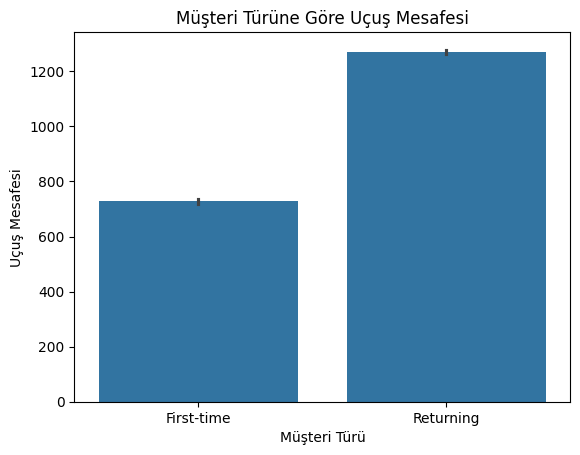

In [ ]:
sns.barplot(x='Customer Type', y='Flight Distance', data=df)
plt.title('Müşteri Türüne Göre Uçuş Mesafesi')
plt.xlabel("Müşteri Türü")
plt.ylabel("Uçuş Mesafesi")
plt.show()

İlk defa seyahat edenler, daha fazla seyahet edenlere göre daha kısa mesafe uçuş tercihinde bulunmuşlardır.

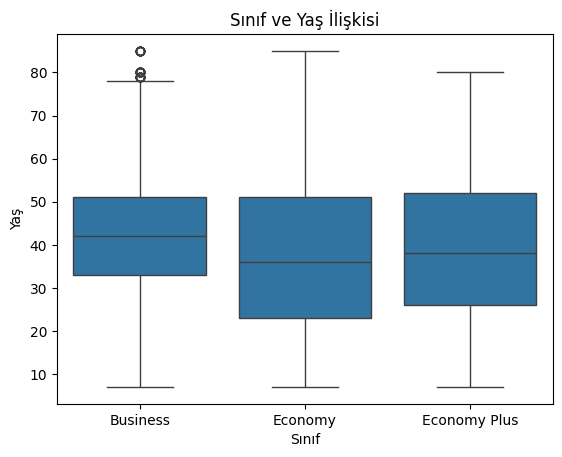

In [ ]:
sns.boxplot(x='Class', y='Age', data=df)
plt.title('Sınıf ve Yaş İlişkisi')
plt.xlabel("Sınıf")
plt.ylabel("Yaş")
plt.show()

Business sınıfında uçuş yapan insanlar genellikle daha yaşca olgun insanlar.
Economy sınıfı daha genel kesime hitap eden bir sınıf.
Economy Plus sınıfı ise Economy sınıfına göre biraz daha yaşca olgun insanların uçuş yaptığı sınıf olmuş.

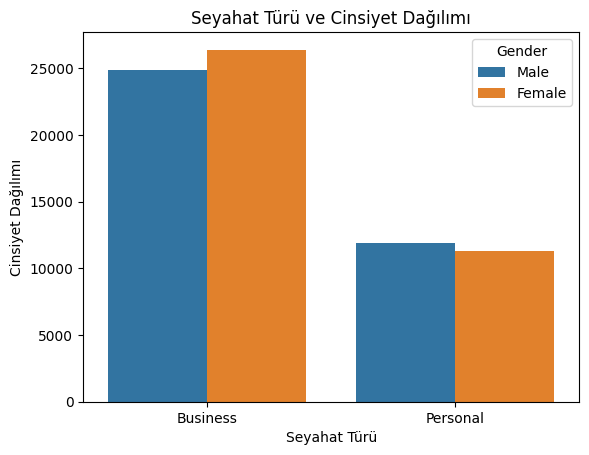

In [ ]:
sns.countplot(x='Type of Travel', hue='Gender', data=df)
plt.title('Seyahat Türü ve Cinsiyet Dağılımı')
plt.xlabel("Seyahat Türü")
plt.ylabel("Cinsiyet Dağılımı")
plt.show()

Genel olarak grafiğe baktığımızda uçuşların büyük kısmı iş için yapılan uçuşlar olduğunu görüyoruz. İş için yapılan uçuşlarda kadın yolcularımız erkeklere göre daha fazladır. Kişisel seyahet için yapılan uçuşlarda ise erkek yolcularımız kadın yolcularımıza göre daha fazladır.

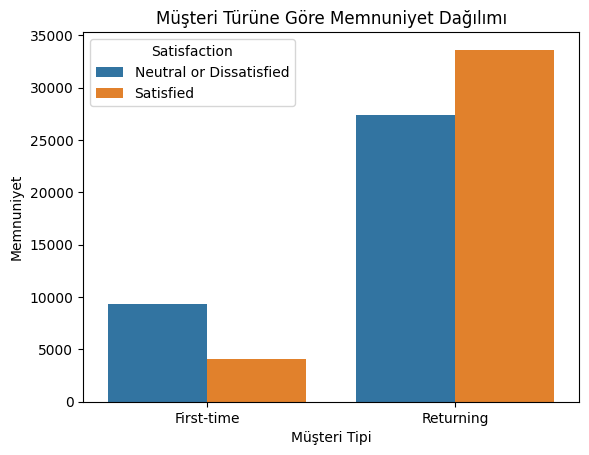

In [ ]:
sns.countplot(x='Customer Type', hue='Satisfaction', data=df)
plt.title('Müşteri Türüne Göre Memnuniyet Dağılımı')
plt.xlabel("Müşteri Tipi")
plt.ylabel("Memnuniyet")
plt.show()

İlk defa uçak seyaheti yapan yolcular genellikle nötr ya da memnun olmadan ayrılmışlardır. Bir daha yolculuk yaptıklarında bu durum tersine dönmüş memnun kalan yolcular daha fazladır.

**KATEGORİK DEĞİŞKENLERİN İÇERİKLERİNE BAKIYORUZ**

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 74418 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   ID                                      74418 non-null  int64  
 1   Gender                                  74418 non-null  object 
 2   Age                                     74418 non-null  int64  
 3   Customer Type                           74418 non-null  object 
 4   Type of Travel                          74418 non-null  object 
 5   Class                                   74418 non-null  object 
 6   Flight Distance                         74418 non-null  int64  
 7   Departure Delay                         74418 non-null  int64  
 8   Arrival Delay                           74418 non-null  float64
 9   Departure and Arrival Time Convenience  74418 non-null  int64  
 10  Ease of Online Booking                  74418 non-null  int64 

In [ ]:
print(df["Gender"].value_counts())
print(df["Customer Type"].value_counts())
print(df["Type of Travel"].value_counts())
print(df["Class"].value_counts())
print(df["Satisfaction"].value_counts())

Gender
Female    37701
Male      36717
Name: count, dtype: int64
Customer Type
Returning     60966
First-time    13452
Name: count, dtype: int64
Type of Travel
Business    51236
Personal    23182
Name: count, dtype: int64
Class
Business        38800
Economy         30886
Economy Plus     4732
Name: count, dtype: int64
Satisfaction
Satisfied                  37694
Neutral or Dissatisfied    36724
Name: count, dtype: int64


**kategorik değişkenleri numeric değişkenlere dönüştürmemiz gerekiyor çünkü verisetimiz makine öğrenmesine uygun bir halde olmalı.**

In [ ]:
df["Gender"] = df["Gender"].map({"Female":0,"Male":1})
df["Customer Type"] = df["Customer Type"].map({"Returning":0,"First-time":1})
df["Type of Travel"] = df["Type of Travel"].map({"Business":0,"Personal":1})
df["Class"] = df["Class"].map({"Business":0,"Economy":1,"Economy Plus":2})
df["Satisfaction"] = df["Satisfaction"].map({"Neutral or Dissatisfied":0,"Satisfied":1})

print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 74418 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   ID                                      74418 non-null  int64  
 1   Gender                                  74418 non-null  int64  
 2   Age                                     74418 non-null  int64  
 3   Customer Type                           74418 non-null  int64  
 4   Type of Travel                          74418 non-null  int64  
 5   Class                                   74418 non-null  int64  
 6   Flight Distance                         74418 non-null  int64  
 7   Departure Delay                         74418 non-null  int64  
 8   Arrival Delay                           74418 non-null  float64
 9   Departure and Arrival Time Convenience  74418 non-null  int64  
 10  Ease of Online Booking                  74418 non-null  int64 

**Makine öğrenimi modelleri için özellik matrisi (X) ile hedef değişkeni (y) oluşturmak amacıyla kullanılır.**

In [ ]:
y = df["Type of Travel"]
X = df.drop("Type of Travel",axis=1)

**Makine Öğrenmesi için verisetimizi parçaladık**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

**Burda X matrisinin ne kadar büyüklükte olduğu öğrenme için ne kadar ayırdığımızı ve test için ne kadar ayırdığımızı görüyoruz**

In [ ]:
X.shape,X_train.shape,X_test.shape

((74418, 23), (52092, 23), (22326, 23))

**Burada modelimizi seçtik kaç kere öğrenmesi gerektiğini söyledik ve bir sorunla karşılaşırsa nasıl çözeceğini söyledik sonrasında model.fit yöntemiyle öğrettik.**

In [ ]:
model = LogisticRegression(max_iter=10000,solver="lbfgs")

In [ ]:
model.fit(X_train,y_train)

LogisticRegression(max_iter=10000)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
model_performansı= accuracy_score(y_test,y_pred)

In [ ]:
print("Model Performansı:",model_performansı)

Model Performansı: 0.7816447191615157


**Test etmek için train kısmında kullanılan sütunlara baktık ve ona göre bir örnek yapısı oluşturucaz.**

In [ ]:
print("Eğitimde kullanılan özelliklerin isimleri:", X_train.columns)

Eğitimde kullanılan özelliklerin isimleri: Index(['ID', 'Gender', 'Age', 'Customer Type', 'Class', 'Flight Distance',
       'Departure Delay', 'Arrival Delay',
       'Departure and Arrival Time Convenience', 'Ease of Online Booking',
       'Check-in Service', 'Online Boarding', 'Gate Location',
       'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness',
       'Food and Drink', 'In-flight Service', 'In-flight Wifi Service',
       'In-flight Entertainment', 'Baggage Handling', 'Satisfaction'],
      dtype='object')


In [ ]:
# Test Etme Kısmı
sample_passenger = {
    'Gender': ['Female'],
    'Age': [50],
    'Customer Type': ['Returning'],
    'Class': ['Economy'],
    'Flight Distance': [1500],
    'Departure Delay': [10],
    'Arrival Delay': [5],
    'Departure and Arrival Time Convenience': [4],
    'Ease of Online Booking': [3],
    'Check-in Service': [5],
    'Online Boarding': [4],
    'Gate Location': [2],
    'On-board Service': [4],
    'Seat Comfort': [3],
    'Leg Room Service': [4],
    'Cleanliness': [1],
    'Food and Drink': [3],
    'In-flight Service': [4],
    'In-flight Wifi Service': [2],
    'In-flight Entertainment': [3],
    'Baggage Handling': [15],
    'Type of Travel': ["Personal Travel"],
    'Travel with Children': [1]
}



# Yeniden sample_passanger_df DataFrame oluşturuyoruz.
sample_passenger_df = pd.DataFrame(sample_passenger)

# Kategorik değişkenleri kodluyoruz
sample_passenger_df["Gender"] = sample_passenger_df["Gender"].map({"Female":0,"Male":1})
sample_passenger_df["Customer Type"] = sample_passenger_df["Customer Type"].map({"Returning":0,"First-time":1})
sample_passenger_df["Class"] = sample_passenger_df["Class"].map({"Business":0,"Economy":1,"Economy Plus":2})
sample_passenger_df["Type of Travel"] = sample_passenger_df["Type of Travel"].map({"Personal Travel":0,"Business travel":1})

# Numpy dizisine dönüştürüyoruz.
degerler = np.array(sample_passenger_df)



# Tahmin Yapma
sonuc = model.predict(degerler)

print(sonuc)

[1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


**YOUTUBE VİDEO LİNK: https://youtu.be/n9xdBJPjMzo**